# **Denoising**
<hr/>

**Task 1:** Finding correlation <br/>
**Task 2:** Finding edges through filter <br/>
**Task 3:** Salt and pepper noise <br/>
**Task 4:** Image denoising and sharpening



## **Importing the necessary libraries**


*   [OpenCV](): Computer vision library

*   [numpy](https://numpy.org/doc/): Library for N-dimensional array.

*   [matplotlib](https://matplotlib.org/): Library containing packages for visualisation.

*   [scipy](): Scientific library to find correlation

*   [random](): Mathematical library to generate random values. 

In [1]:

import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import cv2
import random

**Loading Image**

Let us first downlad image and load it using openCV.

In [2]:
image_path = r'D:\CV\images\Frogrbc1000x.jpg' 


In [3]:
#Loading in grayscale form
img = cv2.imread(image_path, 0)


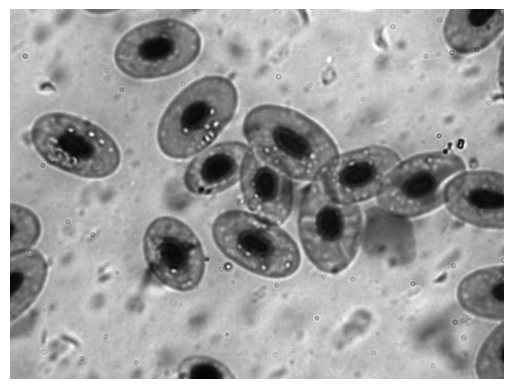

In [4]:
# Displaying the image
plt.imshow(img, cmap='gray')
plt.axis('off')  
plt.show()

## Correlation

---


In this section we will use some portion of the image and try to correlation between the portion and the whole image. First we will extract the pattern from the image.

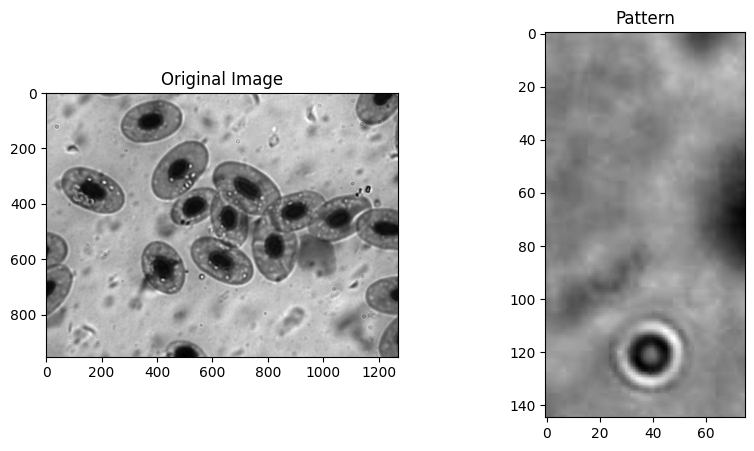

In [5]:
#Extracting portion from the image
pattern = img[0:145, 0:75]
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(img, cmap='gray',)
ax1.set_title("Original Image")
ax2 = fig.add_subplot(122)
ax2.imshow(pattern, cmap='gray', label="Repeated Pattern")
ax2.set_title("Pattern")

plt.show()

Here, we are going to find 2D correlation between `pattern` and `img` file using signal class of scipy module. Use `symm` boundary and `full` mode in the parameter.

In [6]:
# Performing 2D correlation between the image and pattern
corr = signal.correlate2d(img, pattern, boundary='symm', mode='full')

Now let us visualize where the algorithm finds the matching pattern within the image. Red dot in the original image shows the location of pattern.

C:\Users\Sann\AppData\Local\Temp\ipykernel_20608\1077573014.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


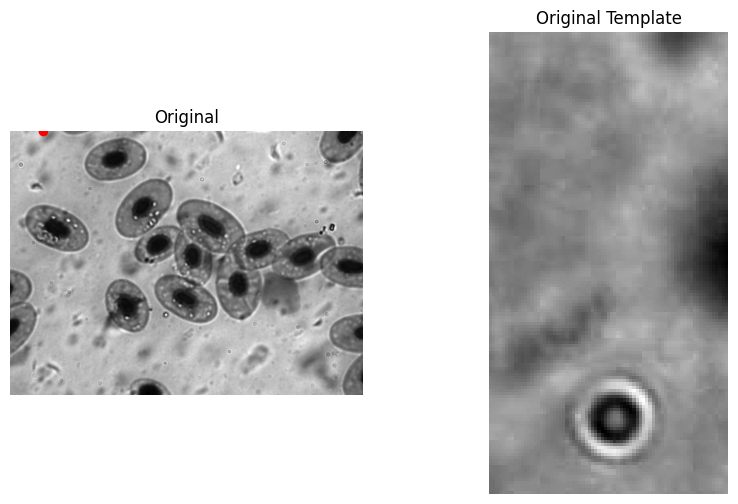

In [7]:
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
fig, (ax_orig, ax_template) = plt.subplots(1, 2, figsize=(10, 6))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(pattern, cmap='gray')
ax_template.set_title('Original Template')
ax_template.set_axis_off()

ax_orig.plot(x, y, 'ro')
fig.show()

## **Exercise 2: Finding edges through kernel**

---
Here, we are going to use edge detecting kernel provided in the reading material to find the edges in the cell image. You will use the kernel in the `filter2D` function of openCV library.

In [8]:
## Defining the edge detection kernel 
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])


In [9]:
# Using filter2D
edge = cv2.filter2D(img, -1, kernel)
edge_normalized = cv2.normalize(edge, None, 0, 255, cv2.NORM_MINMAX)

Now let us visalize the original image and the edge detecting image.

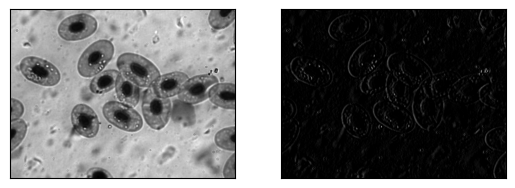

In [10]:
# Displaying the original image
plt.subplot(121)
plt.imshow(img, cmap='gray') 
plt.xticks([]), plt.yticks([])

# Displaying the edge-detected image
plt.subplot(122)
plt.imshow(edge_normalized, cmap='gray')  
plt.xticks([]), plt.yticks([])


plt.show()

## Adding salt and pepper noise

---
Here, we are going to write code such that the function returns image with salt and pepper noise. The function takes image and prob as parameter. 'prob' basically defines the probabilty of salt and pepper noise.

In [11]:
#Defining the probability
prob = 0.2

In [12]:
#Original iimage to add noise
output = np.copy(img) 

In [13]:
# Generating random numbers for salt and pepper noise
num_salt = np.ceil(prob * img.size * 0.5)
num_pepper = np.ceil(prob * img.size * 0.5)

In [14]:
#Adding salt noise
coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
output[coords_salt[0], coords_salt[1]] = 25 

In [15]:
#Adding pepper noise
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
output[coords_pepper[0], coords_pepper[1]] = 0  

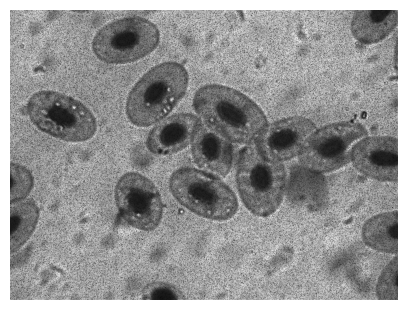

In [16]:
# Displaying the noisy image
plt.figure(figsize=(5, 5))
plt.imshow(output, cmap='gray')
plt.axis('off')  
plt.show()

# Removing the noise on the image using Gaussian blur and Median blur
We are going to use both gaussian blur and median blur to remove the noise on the image and see which one does better. Use sigmaX and sigmaY as $0.8$ value, kernel of $(5,5)$ and for median blur use kernel of size $5$.

In [17]:
# Applying Gaussian blur
sigmaX = 0.8
sigmaY = 0.8
gblurr2 = cv2.GaussianBlur(img, (5, 5), sigmaX)

In [18]:
# Applying Median blur
mblurr2 = cv2.medianBlur(img, 5)

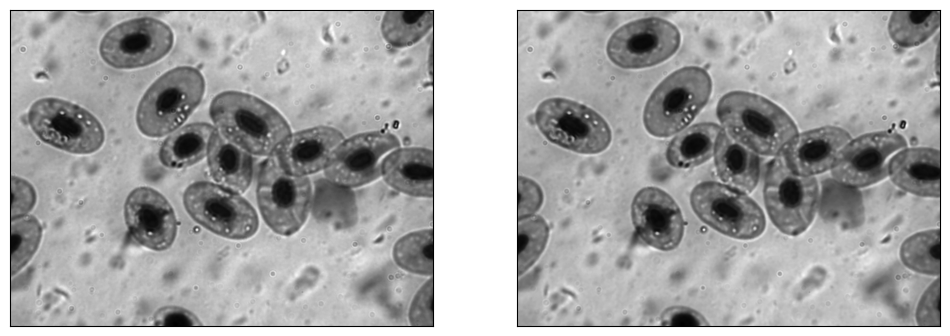

In [19]:
#Displaying
fig = plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(gblurr2, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(mblurr2, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()